<div class="alert alert-success">
<font color='black'>
    
# ORIGINAL GAS IN-PLACE (OGIP)
  
Probabilistic estimation. <br>

</font>
</div>

In [1]:
from scipy.stats import lognorm, norm, truncnorm
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, Javascript, display_html, HTML 

display(HTML("<style>.cm-s-ipython span.cm-comment { color: darkblue; }</style>")) # Comments color = blue

def run_cell_by_index(index):
    display(Javascript(f'Jupyter.notebook.execute_cells([{index}])'))

# Start functions to:


In [2]:
# Set the trials/samples to generate input distributions and OGIP calculation.
# generate distributions and samples.
# generate distribution plots for inputs.
# Start function to generate scatter plots for Inputs vs OGIP.

V_trials = 10000
run_cell_by_index(11) # run cell that contains all functions
run_cell_by_index(12) # run cell that contains all functions
run_cell_by_index(13) # run cell that contains all functions

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Set input values to generate samples and distributions
### Rock volume, NTG, Porosity, Water Saturation, Eg, etc.

Stats,Rock_Vol,NTG,Porosity,Sw,Eg,RFg,Merma,CGR,RFo
Samples,10000,10000,10000,10000,10000,10000,10000,10000,10000
Mean,8652.7,0.522,0.0556,0.3549,325.2,0.649,0.894,18.3,0.579
SD,2625.6,0.0976,0.019,0.111,43.2,0.087,0.054,1.4,0.216
Min,4024.2,0.141,0.01,0.1,250.0,0.5,0.8,15.1,0.2
P99,4508.9,0.294,0.015,0.123,251.4,0.503,0.802,15.5,0.208
P90,5548.9,0.397,0.031,0.21,265.0,0.53,0.819,16.4,0.277
P75,6482.0,0.457,0.042,0.276,287.8,0.574,0.847,17.3,0.394
P50,8240.6,0.522,0.055,0.353,325.1,0.647,0.894,18.2,0.581
P25,10511.0,0.589,0.069,0.431,362.6,0.724,0.942,19.3,0.765
P10,12533.5,0.645,0.08,0.501,384.8,0.769,0.97,20.3,0.876


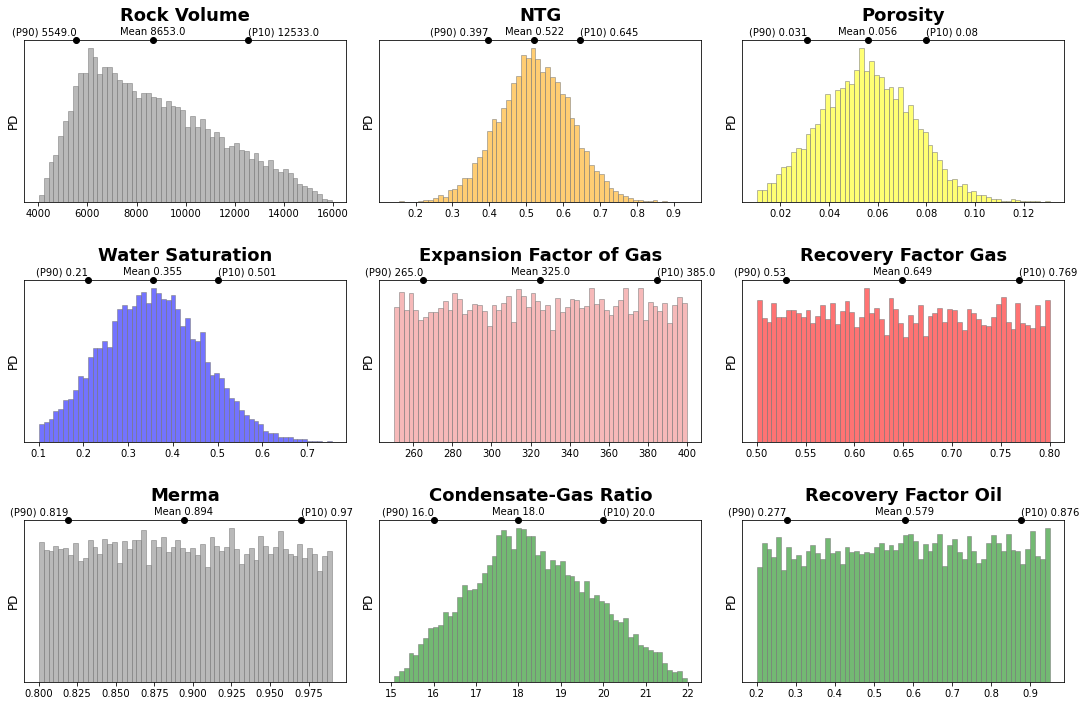

In [6]:
Input_var_dict ={}

Dist_Type,var_label, val_Const = 'Triangular', 'Rock Volume', 5000
low, high, val_Mode = 4000, 16000, 6000                   
val_P90, val_P10 = 2000, 5000          
Input_var_dict['Rock_Vol'] = [Dist_Type, var_label, val_Const, low, high, val_Mode, val_P90, val_P10]

Dist_Type,var_label, val_Const = 'Normal', 'NTG', 0.5
low, high, val_Mode = 0.01, 0.95, 0.5                  
val_P90, val_P10 = 0.4, 0.65         
Input_var_dict['NTG'] = [Dist_Type, var_label, val_Const, low, high, val_Mode, val_P90, val_P10]

Dist_Type,var_label, val_Const = 'Normal', 'Porosity', 0.1
low, high, val_Mode = 0.01, 0.2, 0.07                  
val_P90, val_P10 = 0.03, 0.08        
Input_var_dict['Porosity'] = [Dist_Type, var_label, val_Const, low, high, val_Mode, val_P90, val_P10]

Dist_Type,var_label, val_Const = 'Normal', 'Water Saturation', 0.5
low, high, val_Mode = 0.1, 1, 0.5                   
val_P90, val_P10 = 0.2, 0.5          
Input_var_dict['Sw'] = [Dist_Type, var_label, val_Const, low, high, val_Mode, val_P90, val_P10]
                
Dist_Type,var_label, val_Const = 'Uniform', 'Expansion Factor of Gas', 300
low, high, val_Mode = 250, 400, 350                  
val_P90, val_P10 = 270, 320          
Input_var_dict['Eg'] = [Dist_Type, var_label, val_Const, low, high, val_Mode, val_P90, val_P10]

               
Dist_Type,var_label, val_Const = 'Uniform', 'Recovery Factor Gas', 0.6
low, high, val_Mode = 0.5, 0.8, 0.6                  
val_P90, val_P10 = 0.4, 0.8          
Input_var_dict['RFg'] = [Dist_Type, var_label, val_Const, low, high, val_Mode, val_P90, val_P10]

Dist_Type,var_label, val_Const = 'Uniform', 'Merma', 0.95
low, high, val_Mode = 0.8, 0.99, 0.95             
val_P90, val_P10 = 0.95, 0.97          
Input_var_dict['Merma'] = [Dist_Type, var_label, val_Const, low, high, val_Mode, val_P90, val_P10]
                
Dist_Type,var_label, val_Const = 'Triangular', 'Condensate-Gas Ratio', 22
low, high, val_Mode = 15, 22, 18                   
val_P90, val_P10 = 20, 30          
Input_var_dict['CGR'] = [Dist_Type, var_label, val_Const, low, high, val_Mode, val_P90, val_P10]
                
Dist_Type,var_label, val_Const = 'Uniform', 'Recovery Factor Oil', 0.6
low, high, val_Mode = 0.2, 0.95, 0.6                  
val_P90, val_P10 = 0.4, 0.8            
Input_var_dict['RFo'] = [Dist_Type, var_label, val_Const, low, high, val_Mode, val_P90, val_P10]

fig,ax= plt.subplots(nrows=3, ncols=3, figsize=(15,10), layout ='constrained')

Input_df,Input_Stats_df = Generate_Samples_and_Plot_Distribution()
display(Input_Stats_df)

# Calculate OGIP using input samples

Stats,OGIP_Bcf,Gas_Prod_Bcf,Gas_sale,OOIP
Samples,10000,10000,10000,10000
Mean,1860.7,1208.6,1081.4,34099.3
SD,1063.9,718.5,647.6,19706.9
Min,163.3,92.3,87.2,3057.5
P99,346.3,215.6,195.9,6253.3
P90,750.4,472.3,418.5,13658.0
P75,1102.4,700.9,624.0,20046.5
P50,1632.8,1040.4,933.4,29774.4
P25,2371.3,1540.7,1386.3,43441.2
P10,3278.4,2155.6,1920.3,60021.1


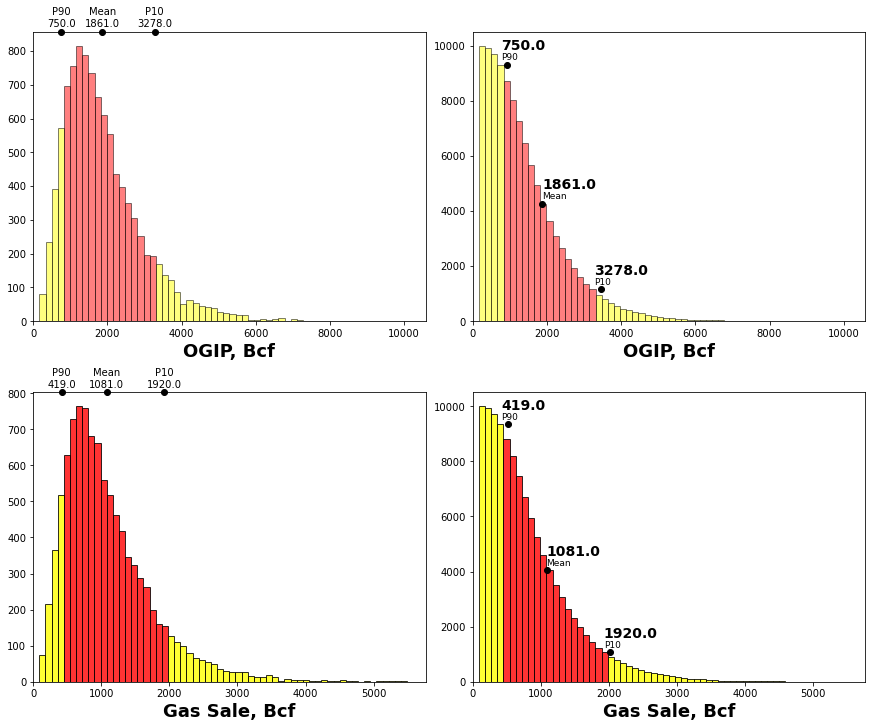

In [7]:
OGIP_arr, Gas_Prod_arr, Gas_sale_arr, OOIP_arr, Oil_Reserves_arr=[], [], [], [], [] #create empty arrays for solutions

i = 0
for index, row in Input_df.iterrows():
    Vrock_i, NTG_i, Poro_i, Sw_i = row['Rock_Vol'], row['NTG'], row['Porosity'], row['Sw']
    Eg_i, RFg_i, Merma_i, CGR_i, RFo_i = row['Eg'], row['RFg'], row['Merma'], row['CGR'], row['RFo']
    
    OGIP = (43560*((3.2808**3)/43560*1000000)*Vrock_i*Poro_i*NTG_i*(1-Sw_i)*Eg_i)/1000000000
    Gas_Prod, Gas_sale = OGIP * RFg_i, (OGIP * RFg_i) * Merma_i
    OOIP, Oil_Reserves = OGIP * CGR_i, (OGIP*CGR_i) * RFo_i
    
    OGIP_arr.append(OGIP), Gas_Prod_arr.append(Gas_Prod), Gas_sale_arr.append(Gas_sale)
    OOIP_arr.append(OOIP), Oil_Reserves_arr.append(Oil_Reserves)
    i = i +1

OGIP_df, OGIP_Stats_df = generate_DF_and_Format_Table()

## Plot distributions
fig, ax2= plt.subplots(nrows = 2, ncols=2, figsize=(12,10), layout ='constrained')
Plot_OGIP(OGIP_df['OGIP_Bcf'],0,'OGIP, Bcf')
Plot_OGIP(OGIP_df['Gas_sale'],1, 'Gas Sale, Bcf')

### Generate scatter plot for all variables against OGIP
### Calculate correlation and generate tornado plot

,OGIP
Porosity,0.599355
Rock_Vol,0.544105
NTG,0.319875
Eg,0.237642
Sw,-0.300591


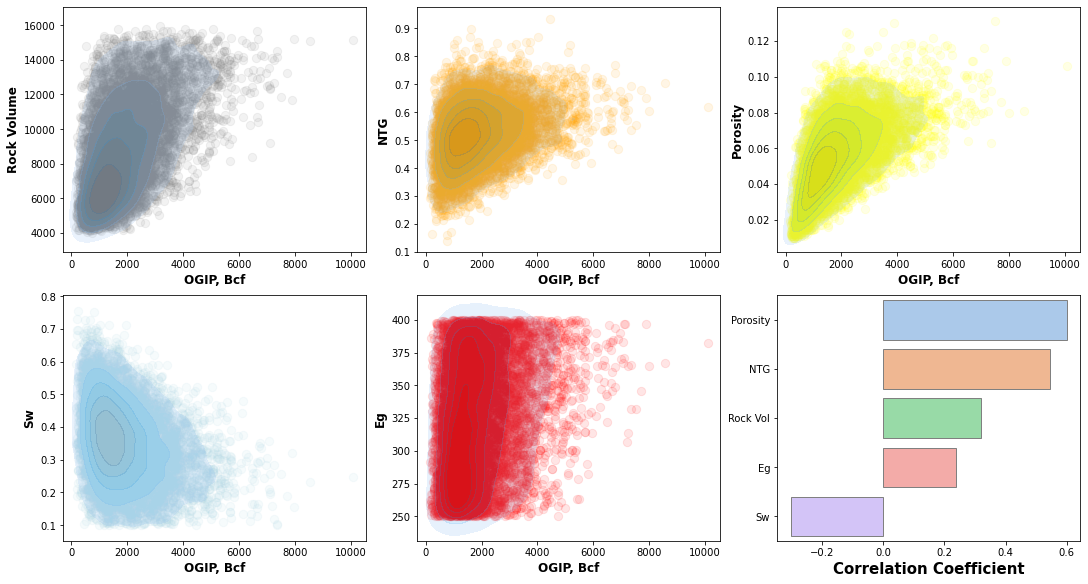

In [8]:

Input_df['OGIP'] = OGIP_df['OGIP_Bcf']

corr_DF_Coeff = Input_df.corr()


## Create Plots ##
fig, axSC= plt.subplots(nrows=2, ncols=3, figsize=(15,8), layout ='constrained')

Plot_Scatter(Input_df['OGIP'],Input_df['Rock_Vol'],'Rock Volume','gray',0,0)
Plot_Scatter(Input_df['OGIP'],Input_df['NTG'],'NTG','orange',0,1)
Plot_Scatter(Input_df['OGIP'],Input_df['Porosity'],'Porosity','yellow',0,2)
Plot_Scatter(Input_df['OGIP'],Input_df['Sw'],'Sw','lightblue',1,0)
Plot_Scatter(Input_df['OGIP'],Input_df['Eg'],'Eg','red',1,1)


OGIP_Coeff = corr_DF_Coeff['OGIP']
OGIP_Coeff = OGIP_Coeff.drop('OGIP')
OGIP_Coeff = OGIP_Coeff.drop('RFo')
OGIP_Coeff = OGIP_Coeff.drop('Merma')
OGIP_Coeff = OGIP_Coeff.drop('CGR')
OGIP_Coeff = OGIP_Coeff.drop('RFg')

OGIP_Coeff.sort_values(ascending = False, axis=0,inplace=True)

OGIP_Coeff_df = pd.DataFrame(OGIP_Coeff)
display(OGIP_Coeff_df)

Input_Var_Names = ['Porosity','NTG','Rock Vol','Eg', 'Sw']
xx,yy = 1,2
sns.barplot(y=Input_Var_Names, x=OGIP_Coeff, ax=axSC[xx,yy], orient="h", palette='pastel',edgecolor='gray');
axSC[xx,yy].set_xlabel('Correlation Coefficient', fontsize = 15,weight='bold');

# Functions

### -> Generate distributions and samples.
### -> Generate distribution plots for inputs.
### -> Start function to generate scatter plots for Inputs vs OGIP.

In [3]:
## generate distributions and samples.
## generate distribution plots for inputs.
## Start function to generate scatter plots for Inputs vs OGIP.

def GenSamples(Dist_Type, V_P90, V_P10, V_Low_limit, V_mode, V_High_limit, V_Constant):

    if Dist_Type == 'Uniform':
        Samples_arr = np.random.uniform(low=V_Low_limit, high=V_High_limit, size=V_trials)

    if Dist_Type == 'Triangular':
        Samples_arr = np.random.triangular(left=V_Low_limit, mode=V_mode,right= V_High_limit, size=V_trials)

    if Dist_Type == 'Normal':
        x1, x2 = V_P90, V_P10 #x1, x2 = 10, 90
        p1ppf, p2ppf = norm.ppf(0.10), norm.ppf(0.90)

        Mean = ((x1 * p2ppf) - (x2 * p1ppf)) / (p2ppf - p1ppf)  #Mean
        SD = (x2 - x1) / (p2ppf - p1ppf)                         # Standard Dev

        a,b = (V_Low_limit-Mean)/SD, (V_High_limit-Mean)/SD
        Samples_arr = truncnorm.rvs(a=a,b=b, loc=Mean, scale=SD, size=V_trials)
        #NT_Samples=truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD, size=V_samples)
        
    if Dist_Type == 'Log-Normal':
        x1, x2 = np.log(V_P90), np.log(V_P10) #x1, x2 = 10, 90
        p1ppf, p2ppf = norm.ppf(0.10), norm.ppf(0.90)

        Mean = ((x1 * p2ppf) - (x2 * p1ppf)) / (p2ppf - p1ppf)   #Mean
        SD = (x2 - x1) / (p2ppf - p1ppf)                         # Standard Dev

        a,b = (V_Low_limit-Mean)/SD, (V_High_limit-Mean)/SD
        #Samples_arr = truncnorm.rvs(a=a,b=b, loc=Mean, scale=SD, size=V_trials)
        Samples_arr = lognorm(s=SD, scale=np.exp(Mean)).rvs(size=V_trials)
        
    n_Samples, n_Mean, n_SD = Samples_arr, np.mean(Samples_arr), np.std(Samples_arr)
    
    return n_Samples, n_Mean, n_SD

###########################################################
# Start function to generate distribution plots for inputs

def Plot_distributions(Samples_arr, V_Title,V_color, n_row,n_col):
    ax[n_row,n_col].hist(Samples_arr, bins=60, density=True, align='mid', color=V_color, alpha=0.55, edgecolor = "gray")
    ax[n_row,n_col].set_title(V_Title, weight='bold', fontsize = 18, pad=19)
    ax[n_row,n_col].set_xlabel(' ', fontsize = 18)
    
    
    y_limit = ax[n_row,n_col].get_ylim()
    ax[n_row,n_col].set_ylim(y_limit)
    
    ### Plot black dot Mean ###
    n_Mean = round(np.mean(Samples_arr),3)
    if n_Mean > 1:
        n_Mean = round(n_Mean,0)
        
    n_txt = 'Mean ' + str(n_Mean)
    ax[n_row,n_col].annotate(n_txt, xy=(n_Mean,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                             horizontalalignment='center')
    
    ax[n_row,n_col].scatter(n_Mean, y_limit[1], clip_on=False,color='black') 
    
    ### Plot black dot P90 ###
    pn = round(np.percentile(Samples_arr, 10),3)
    if pn > 1:
        pn = round(pn,0)
        
    n_txt = '(P90) ' + str(pn)
    ax[n_row,n_col].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                            horizontalalignment='right')
    
    ax[n_row,n_col].scatter(pn, y_limit[1], clip_on=False,color='black') 
    
    ### Plot black dot P10 ###
    pn = round(np.percentile(Samples_arr, 90),3)
    if pn > 1:
        pn = round(pn,0)
        
    n_txt = '(P10) ' +str(pn)
    ax[n_row,n_col].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                            horizontalalignment='left')
    
    ax[n_row,n_col].scatter(pn, y_limit[1], clip_on=False,color='black')
    
    ax[n_row,n_col].get_yaxis().set_ticks([])
    #ax[n_row,n_col].get_yaxis().set_visible(False)
    ax[n_row,n_col].set_ylabel('PD', fontsize = 12)

    
# Start function to generate scatter plots for Inputs vs OGIP

def Plot_Scatter(X_sample,Y_sample, y_text,V_color, xx,yy):
    axSC[xx,yy].scatter(x=X_sample, y=Y_sample, color=V_color, alpha=0.1, s = 70)
    axSC[xx,yy].set_xlabel('OGIP, Bcf', size=12, weight='bold')
    axSC[xx,yy].set_ylabel(y_text, size=12, weight='bold')
    
    sns.kdeplot(x=X_sample, y=Y_sample, levels=6, fill=True, alpha=0.2, cut=2, ax=axSC[xx,yy], label='---');

    
    
def Plot_OGIP(OGIP_Samples,r_chart, x_Label):
    if r_chart == 0:
        alp = 0.5
    else:
        alp = 0.8
    N, bins, patches = ax2[r_chart,0].hist(OGIP_Samples, bins=60, edgecolor='black', linewidth=1, color='red',alpha=alp)
    
    # facecolor for each bar
    pn90 = round(np.percentile(OGIP_Samples, 10),3)
    pn10 = round(np.percentile(OGIP_Samples, 90),3)
    for i in range(len(N)):
        if (bins[i] < pn90) or (bins[i]>=pn10):
           patches[i].set_facecolor('yellow')

    ax2[r_chart,0].set_xlim(left=0)
    ax2[r_chart,0].set_xlabel(x_Label, fontsize = 18,weight='bold');

    y_limit = ax2[r_chart,0].get_ylim()
    ax2[r_chart,0].set_ylim(y_limit)

    ### Plot black dot Mean ###
    n_Mean = round(np.mean(OGIP_Samples),3)
    if n_Mean > 1:
        n_Mean = round(n_Mean,0)
        
    n_txt = str(n_Mean)
    ax2[r_chart,0].annotate(n_txt, xy=(n_Mean,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                             horizontalalignment='center')

    ax2[r_chart,0].annotate('Mean', xy=(n_Mean,y_limit[1]), xycoords='data', xytext=(0,17), textcoords='offset points',
                             horizontalalignment='center')
        
    ax2[r_chart,0].scatter(n_Mean, y_limit[1], clip_on=False,color='black')


    ### Plot black dot P90 ###
    pn = round(np.percentile(OGIP_Samples, 10),3)
    if pn > 1:
        pn = round(pn,0)
        
    n_txt = str(pn)
    ax2[r_chart,0].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                            horizontalalignment='center')

    ax2[r_chart,0].annotate('P90', xy=(pn,y_limit[1]), xycoords='data', xytext=(0,17), textcoords='offset points',
                            horizontalalignment='center')
        
    ax2[r_chart,0].scatter(pn, y_limit[1], clip_on=False,color='black') 
    
    ### Plot black dot P10 ###
    pn = round(np.percentile(OGIP_Samples, 90),3)
    max_val = np.max(OGIP_Samples)

    if pn > 1:
        pn = round(pn,0)
        
    n_txt = str(pn)
    ax2[r_chart,0].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                            horizontalalignment='center')
    n_txt = 'P10'
    ax2[r_chart,0].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,17), textcoords='offset points',
                            horizontalalignment='center')
        
    x_val = pn
    y_val = y_limit[1]
    ax2[r_chart,0].scatter(x_val, y_val, clip_on=False,color='black')
    
    
    
    #########################################################
    # Cumulative Plot
    Nc, binsc, patchesc = ax2[r_chart,1].hist(OGIP_Samples,cumulative=-1, bins=60, edgecolor='black', linewidth=1, 
                                   color='red',alpha=alp)
    axx2 = ax2[r_chart,1]
    # facecolor for each bar
    pn90, pn10 = round(np.percentile(OGIP_Samples, 10),3), round(np.percentile(OGIP_Samples, 90),3)
    max_ogip = np.max(binsc)
    
    for i in range(len(Nc)):
        if (binsc[i] < pn90) or (binsc[i]>=pn10):
           patchesc[i].set_facecolor('yellow')
        
        if binsc[i]<n_Mean:
            y_limit_M=Nc[i]

        if binsc[i]<pn90:
            y_limit_P90=Nc[i]

        if binsc[i]<pn10:
            y_limit_P10=Nc[i]
    
    axx2.set_xlim(left=0)
    axx2.set_xlabel(x_Label, fontsize = 18,weight='bold');
    
    dx = max_ogip/60
    x_vals, y_vals = [n_Mean, pn90+dx, pn10+dx], [y_limit_M,y_limit_P90,y_limit_P10]
    
    axx2.scatter(x_vals, y_vals, clip_on=False,color='black') # add dots for Mean, P90 and P10
    
    # P10 Annotations on plot
    Add_annotations('P10',pn10, y_limit_P10, dx,axx2)
    Add_annotations('Mean',n_Mean, y_limit_M, dx,axx2)
    Add_annotations('P90',pn90, y_limit_P90, dx,axx2)
    

def Add_annotations(n_txt,x_val,y_val,dx,axx2):
    xx_val,yy_val = x_val+(dx*0), y_val
    axx2.annotate(n_txt, xy=(xx_val,yy_val), xycoords='data', xytext=(0,5), textcoords='offset pixels',
                  horizontalalignment='left', fontsize=9)
    
    n_txt,xx_val, yy_val = str(round(x_val,0)), x_val+(dx*0), y_val
    axx2.annotate(n_txt, xy=(xx_val,yy_val), xycoords='data', xytext=(0,15), textcoords='offset pixels',
                  horizontalalignment='left', fontsize=14, weight='bold')



In [4]:

# Input data cell
def Generate_Samples_and_Plot_Distribution():

    
    color_L = ['gray','orange', 'yellow','blue', 'lightcoral', 'red', 'gray','green', 'green']

    Input_df = pd.DataFrame()
    n_row, n_col,i = 0, 0,0

    for key in Input_var_dict:
        Dist_Type = Input_var_dict[key][0]
        var_label = Input_var_dict[key][1]
        val_Const = Input_var_dict[key][2]
        low, high = Input_var_dict[key][3], Input_var_dict[key][4]
        val_Mode = Input_var_dict[key][5]
        val_P90, val_P10 = Input_var_dict[key][6], Input_var_dict[key][7]

        n_Samples, n_Mean, n_SD = GenSamples(Dist_Type,val_P90,val_P10,low,val_Mode, high,val_Const)
        Input_df[key] = n_Samples

        Plot_distributions(n_Samples, var_label, color_L[i], n_row, n_col)

        i = i + 1
        n_col = n_col + 1
        if n_col == 3:
            n_row = n_row + 1
            n_col = 0
    
    # Set decimals to DF
    Input_df['Rock_Vol'] = Input_df['Rock_Vol'].apply(lambda x: round(x, 1))
    Input_df.NTG = Input_df.NTG.apply(lambda x: round(x, 3))
    Input_df.Porosity = Input_df.Porosity.apply(lambda x: round(x, 3))
    Input_df.Sw = Input_df.Sw.apply(lambda x: round(x, 3))
    Input_df.Eg = Input_df.Eg.apply(lambda x: round(x, 1))
    #Input_df.columns.names = ['Stats']


    Input_Stats_df = Input_df.describe(percentiles=[0.01,0.1,.25,.75,0.9,0.99])

    Input_Stats_df = Input_Stats_df.reset_index(drop=True)
    Input_Stats_df.index = ['Samples', 'Mean', 'SD', 'Min','P99','P90','P75','P50','P25','P10','P1','Max'] 
    Input_Stats_df.columns.names = ['Stats']

    Input_Stats_df.Rock_Vol, Input_Stats_df.NTG = Input_Stats_df.Rock_Vol.round(1), Input_Stats_df.NTG.round(4)
    Input_Stats_df.Porosity, Input_Stats_df.Sw = Input_Stats_df.Porosity.round(4), Input_Stats_df.Sw.round(4)
    Input_Stats_df.Eg = Input_Stats_df.Eg.round(1)
    Input_Stats_df.RFg = Input_Stats_df.RFg.round(3)
    Input_Stats_df.Merma = Input_Stats_df.Merma.round(3)
    Input_Stats_df.CGR = Input_Stats_df.CGR.round(1)
    Input_Stats_df.RFo = Input_Stats_df.RFo.round(3)
    


    # Apply formatting to the first row
    Input_Stats_df.iloc[0] = Input_Stats_df.iloc[0].apply(format_decimals)

    Input_Stats_df

    return Input_df, Input_Stats_df

# Function to format decimals
def format_decimals(value):
    return f"{value:.0f}"


In [5]:
# OGIP cell
def generate_DF_and_Format_Table():    
    ## convert arrays to DF
    OGIP_df = pd.DataFrame ({'OGIP_Bcf':OGIP_arr,'Gas_Prod_Bcf':Gas_Prod_arr, 'Gas_sale':Gas_sale_arr, 'OOIP':OOIP_arr})


    # specify which percentiles to show on tables
    Stats_Table_L = ['Samples', 'Mean', 'SD', 'Min','P99','P90','P75','P50','P25','P10','P1','Max'] 
    Percentiles_L = [0.01,0.1,.25,.75,0.9,0.99]

    OGIP_Stats_df = OGIP_df.describe(percentiles=Percentiles_L)

    OGIP_Stats_df = OGIP_Stats_df.reset_index(drop=True)
    OGIP_Stats_df.index = Stats_Table_L
    OGIP_Stats_df.columns.names = ['Stats']
    
    # Apply formatting to the first row
    OGIP_Stats_df.iloc[0] = OGIP_Stats_df.iloc[0].apply(format_decimals)
    
    df1_styler =  OGIP_Stats_df.style.set_table_attributes("style='display:inline'").set_caption('Solution').format(precision=1)


    df2_styler = Input_Stats_df.style.set_table_attributes("style='display:inline'").set_caption('Input').format(precision=4)

    display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)
    
    return OGIP_df, OGIP_Stats_df




# Interactive controls widgets to generate input distributions
# Work in progress

In [ ]:
#Dist_Type, V_P90, V_P10, V_Low_limit, V_mode, V_High_limit, V_Constant
def Samples_Plots(min_val,max_val):
    min_val = float(min_val)
    min_val = Min_Rock_vol.value
    fig,ax2= plt.subplots(nrows=3, ncols=3, figsize=(15,10), layout ='constrained')


    Vrock_Samples, Vrock_Mean, Vrock_SD = GenSamples('Uniform',1500,12500,min_val,1500,max_val,2500)

    n_row, n_col = 0, 0
    #Plot_distributions(Vrock_Samples, 'Rock Volume, MM m3','gray', n_row, n_col)
    ax2[n_row,n_col].hist(Vrock_Samples, bins=60, density=True, align='mid', color="green", alpha=0.55, edgecolor = "gray")
    print(len(Vrock_Samples))

In [ ]:
Min_val = widgets.FloatSlider(value=100, min=0, max=100000, step=100)
Max_val = widgets.FloatSlider(value=10000, min=0, max=100000, step=100)
Min_Rock_vol = widgets.Text(value='100', placeholder='Type something',description='Min:',disabled=False)

button = widgets.Button(description='Click me',disabled=False,button_style='', tooltip='Click me', icon='check')
button.on_click(Samples_Plots)

In [ ]:
display(Min_Rock_vol)
display(button)

#interact(Samples_Plots, min_val=Min_Rock_vol, max_val=Max_val, c=button)

